### Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    * [Adding an Age Column](#section2_1)
    * [Checking the Education Variable](#section2_2)
* [Exploratory Data Analysis](#EDA)
    * [Big Picture](#section3_1)
    * [Purchasing Behavior by Income](#section3_2)
    * [More Purchasing Behavior by Income](#section3_3)
    * [Purchasing Behavior by Education and Income](#section3_4)
    * [Purchasing Behavior by Age](#section3_5)
* [Conclusion](#conclusion)

### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some marketing data. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/jackdaoud/marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)

Information regarding the features for the data are located in the `Column` section on the website.

Some code inspiration for this analysis was sourced from [this noteboook](https://www.kaggle.com/dimitriirfan/market-eda).

#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from marketing_data.csv and preview the first five rows of the DataFrame.

In [41]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib notebook

In [42]:
#Inspecting the data
df=pd.read_csv('marketing_data.csv')
print(df.head())
print(df.shape)

import warnings
warnings.filterwarnings('ignore')

      id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   

  DtCustomer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0    6/16/14        0       189  ...                  6                  1   
1    6/15/14        0       464  ...                  7                  5   
2    5/13/14        0       134  ...                  5                  2   
3    5/11/14        0        10  ...                  2                  7   
4     4/8/14        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5 

#### Data Information <a class="anchor" id="section1_2"></a>

Some immediate insights are:
* There are 28 columns and 2240 rows.
* The name and datatype of each column -- most values are integers in this dataset.
* The ` income` column has missing data, values that are not integers or floats, and an extra space in the column name, so some cleaning will be necessary for this column prior to conducting EDA. 
* The column names could be renamed for more consistency.
* Some basic summary statistics on each of the numerical variables.

In [43]:
#To have a better idea of the data as a whole
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [44]:
#See if any missing data exists within the data set
df.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [45]:
print(df.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

#### Data Cleaning <a class="anchor" id="cleaning"></a>

As mentioned before, the `Income` column could use some cleaning. The column names overall could also be renamed for more consistency. To do this, the following is done:
* Put all columns in [snake case format](https://www.ssc.wisc.edu/sscc/pubs/DWE/book/4-2-naming-variables.html) using regex and list comprehension
* Change `Income` values to floats
* Set the values as floats

The `Income` distribution is then looked at using boxplots. Since there is one large outlier, it is removed from the `marketing_data`. Next, the missing values are replaced with the mean income using the `.mean()` method.

`Income` is one of the main variables that will be explored in the analysis, so it is essential that it is tidy and ready for exploration

We can see from the `df.head()` that `income` has a $ sign in it, which makes it into an object instead of a integer or a float. So we are aiming to clean the `income` column.

In [46]:
#Cleaning columns

#Removing $ sign from income column
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)
df['Income'].describe()

#Putting all columns into snake case format
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in df.columns]

In [47]:
#To check on the newly cleaned data
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,...,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,response,complain,country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


<IPython.core.display.Javascript object>


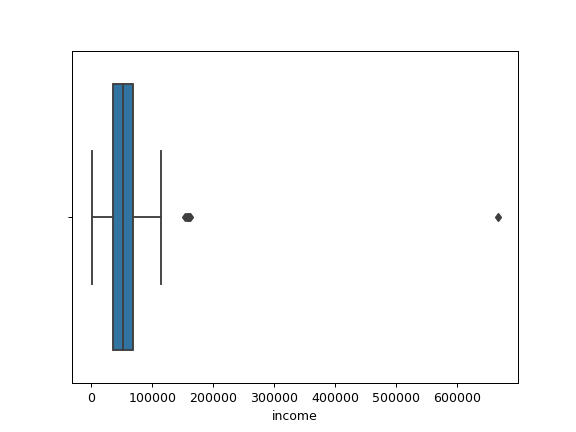

In [48]:
#To further inspect the income column and clean it
plt.figure()
sns.boxplot(df['income'])
plt.show()

<IPython.core.display.Javascript object>


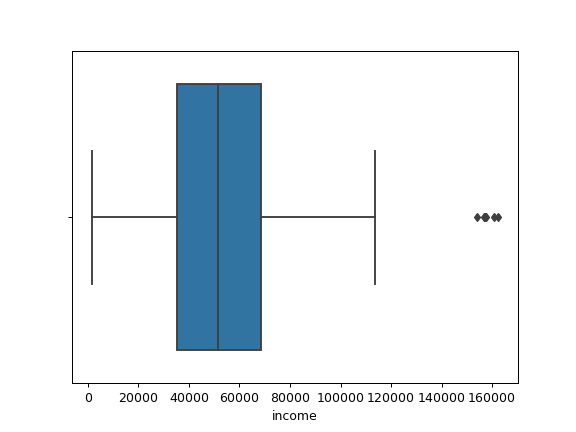

In [49]:
#We can see an outlier in the plot, so it shall be removed
df = df[df.income < 300000]

plt.figure()
sns.boxplot(df.income)
plt.show()

In [50]:
#Replacing missing values of `income` column with mean income
df.income = df.income.fillna(df.mean())

After removing the outlier, the plot seems more relevant. Although certain outliers still exist, but it will not cause a serious disruption to the data or caused a major skewness.

By filling the missing data with mean `income` value, we also prevent missing data from messing our analysis.

`income` variable is ready to be used for analysis.

#### Adding an age Column <a class="anchor" id="section2_1"></a>

The `marketing_data` DataFrame contains a `year_birth` column; however, a column with the age of each customer may be easier for analysis. Because of this, the following is done:

* A new column called `age` is made by subracting each value of `year_birth` from 2020 (the year the dataset is from). 
* Any outliers in `age` that could affect the analysis are removed. 

<IPython.core.display.Javascript object>


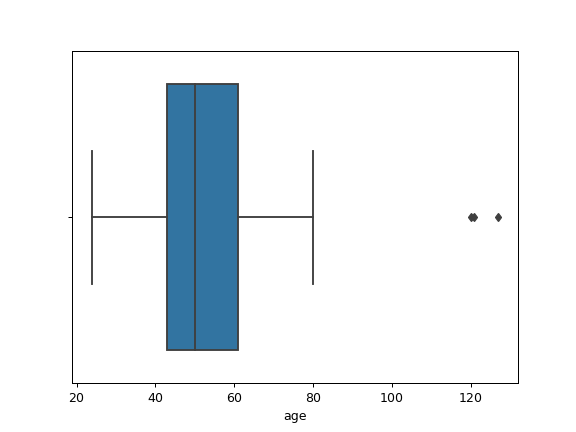

In [51]:
#Creating the age value
df['age'] = 2020 - df['year_birth']

#plotting the age boxplot
plt.figure()
sns.boxplot(df.age)
plt.show()

<IPython.core.display.Javascript object>


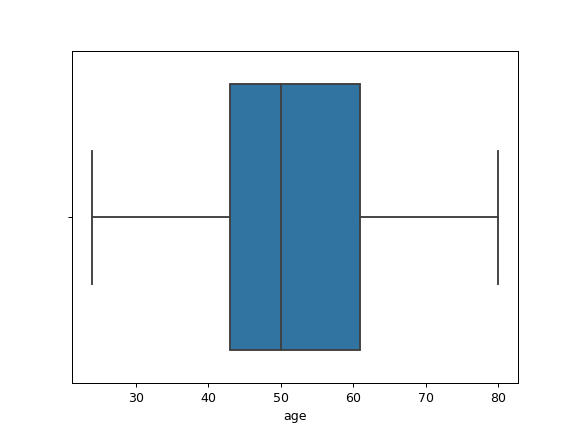

In [52]:
#Similar to income column, there are some outliers in the age value as well, so we are going to remove it
df = df[df.age < 100]

plt.figure()
sns.boxplot(df.age)
plt.show()

#### Checking the Education Variable <a class="anchor" id="section2_2"></a>

The education variable is another column that will be focused on in the analysis. A boxplot is used to see if any cleaning is needed before EDA. There is no missing data or other issues, so it can be left as is.

In [53]:
#To see the contents of `education` variable
df.education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<IPython.core.display.Javascript object>


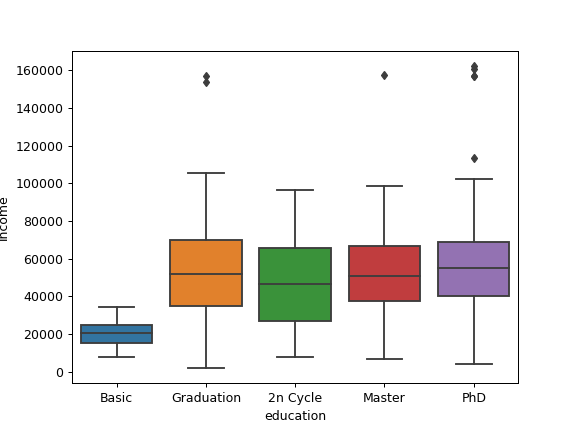

In [54]:
plt.figure()
sns.boxplot(x=df.education, y=df.income, order=['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD'])
plt.show()

### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be focused on in the analysis:
* `income`
* `education`
* `age`

The goal will be to see how these independent variables associate with the following dependent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products`  
* `num_deals_purchases`
* `num_web_purchases`  
* `num_catalog_purchases`  
* `num_store_purchases`

The hope is that through summary statistics and visualizations the following question can be answered:
* Does a shopper's income, education level, and/or age relate to their purchasing behavior? 

Along the way, this question may be refined and more questions may pop up.

#### Big Picture <a class="anchor" id="section3_1">

In order to observe the dataset as a whole, `DataFrame.hist()` is used.. It gives a full view of all numerical variables in the distribution. Most of the amount bought and number purchased variables are skewed right and have similar distributions.

Next, correlations between all numerical variables are viewed using a heat matrix. The heat matrix shows that `income` has the strongest association with numerous variables. Interestingly, it showed that `age` may not be a huge factor overall. This is something to look into it a bit more in the analysis.

<IPython.core.display.Javascript object>


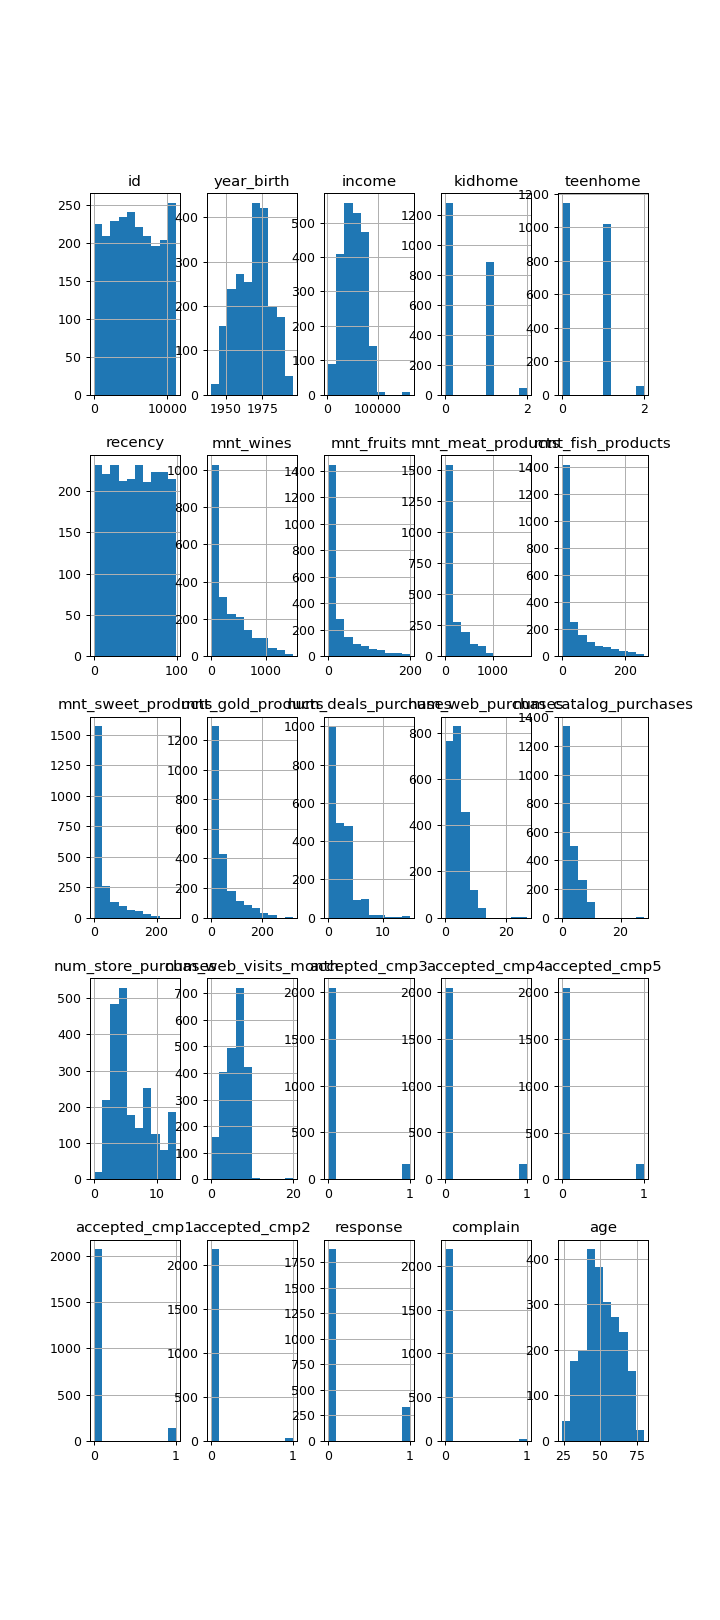

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'year_birth'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'kidhome'}>,
        <AxesSubplot:title={'center':'teenhome'}>],
       [<AxesSubplot:title={'center':'recency'}>,
        <AxesSubplot:title={'center':'mnt_wines'}>,
        <AxesSubplot:title={'center':'mnt_fruits'}>,
        <AxesSubplot:title={'center':'mnt_meat_products'}>,
        <AxesSubplot:title={'center':'mnt_fish_products'}>],
       [<AxesSubplot:title={'center':'mnt_sweet_products'}>,
        <AxesSubplot:title={'center':'mnt_gold_products'}>,
        <AxesSubplot:title={'center':'num_deals_purchases'}>,
        <AxesSubplot:title={'center':'num_web_purchases'}>,
        <AxesSubplot:title={'center':'num_catalog_purchases'}>],
       [<AxesSubplot:title={'center':'num_store_purchases'}>,
        <AxesSubplot:title={'center':'num_web_visits_month'}>,
        <AxesSubplot:title={'center':'acce

In [55]:
fig = plt.figure(figsize=(8,18))
ax = fig.gca()
df.hist(ax=ax)

A quick glance tells us that most histogram shows right-skewness.

#To attempt to see the correlations between different variables
df.corr()

<IPython.core.display.Javascript object>


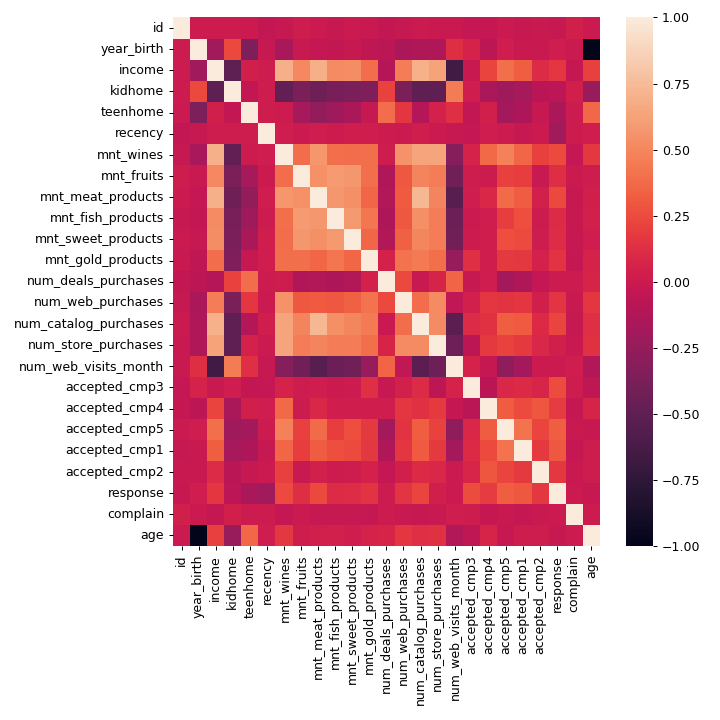

In [56]:
#Using a heat map may help us visualise the correlation between numerical variables

plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(), annot=False)
plt.tight_layout()
plt.show()

A quick observation shows that `income` may play a major role in spending as seen by the many brighter heat map boxes within the `income` row.

### Purchasing Behavior by Income <a class="anchor" id="section3_2"></a>

Now it's time to start looking into the big question. A `for` loop is used to see the relationship between `income` and each `num_{type}_purchases` variable. The `hue` parameter with the `education` variable is used to see if there are any patterns that can be deciphered between `education` and `num_{type}_purchases`. 

First scatterplots are used and then regression plots are used for this analysis.

<IPython.core.display.Javascript object>


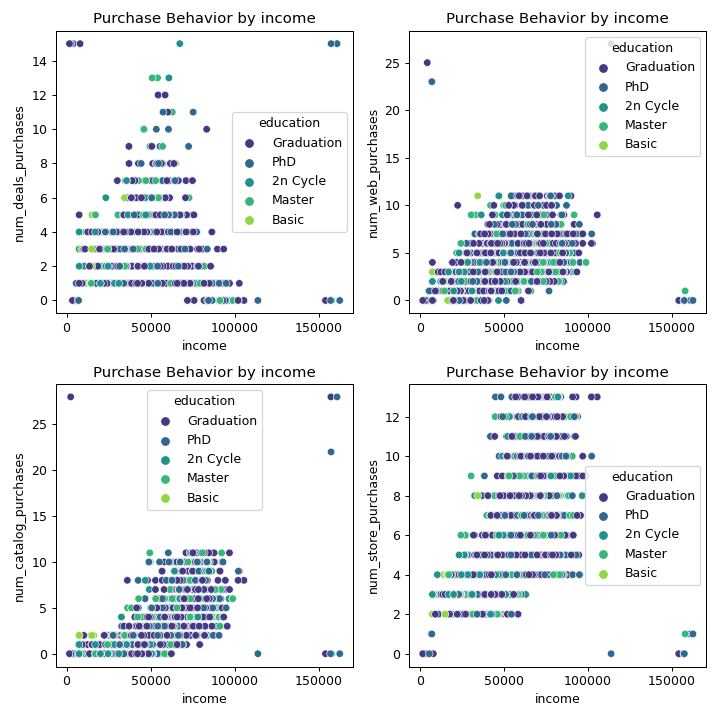

In [57]:
# num purchases columns list
num_purchases_cols = ['num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases']
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(8,8))
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.scatterplot(x=df['income'], y= df[num_purchases_cols[i]], hue=df['education'], palette='viridis')
    plt.title('Purchase Behavior by income')

plt.tight_layout()
plt.show()

There is a fairly strong, positive linear relationship between `income` and the following three variables:
* `num_catalog_purchases`
* `num_store_purchases`
* `num_web_purchases`

Between `income` and `num_deals_purchases`, however, there is no obvious relationship. It appears there might be a weak, negative linear relationship but it is not strong enough to be confident. It is also difficult to decipher any patterns associated with `education` in the plots, so further analysis will be done on this variable. 

<IPython.core.display.Javascript object>


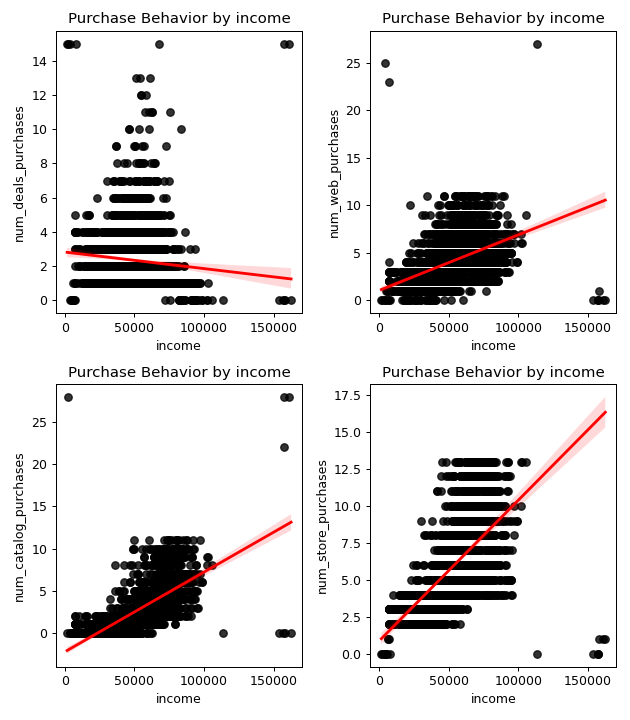

In [58]:
fig = plt.figure(figsize=(7,8))
plot = 0

for i in range(len(num_purchases_cols)):
    plot += 1
    ax = plt.subplot(2, 2, plot) # set up subplots
    sns.regplot(x=df["income"], y= df[num_purchases_cols[i]], # setting up regression plot
                scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

To get a better look at the linear relationships, `.regplot()` was used. 

`num_catalog_purchases` and `num_store_purchases` have the strongest positive, linear relationship with `income`. 

These plots also show that `income` and `num_deals_purchases` have a linear, negative relationship; however, it is still too weak to be conclusive. My personal interpretation suggests that this may be because all education levels will still be interested and benefit from a promotion or a discount.

For some further analysis, a new column in the DataFrame called `total_purchases` is added to the `marketing_data` DataFrame. It is the sum of all `num_{type}_purchases` variables. The same analysis with `.scatterplot()` and `.regplot()` plot methods is done on this new column.

In [59]:
#Adding the new column of total_purchases
df['total_purchases'] = df['num_deals_purchases'] + df['num_web_purchases'] + df['num_catalog_purchases'] + df['num_store_purchases']

<IPython.core.display.Javascript object>


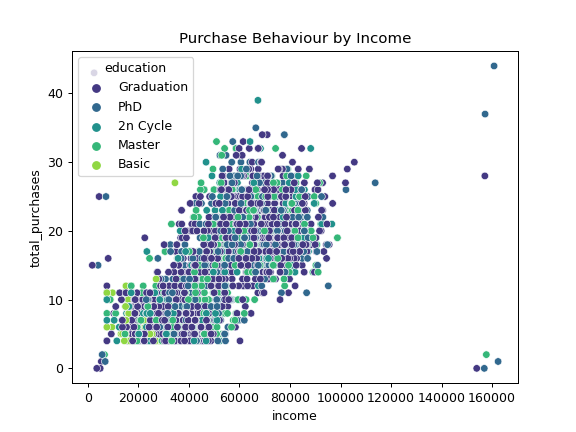

<IPython.core.display.Javascript object>


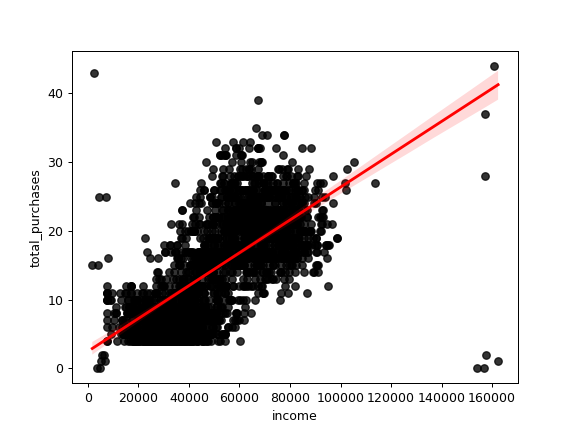

In [60]:
#Plotting the scatterplot of total_purchases against income
plt.figure()
sns.scatterplot(y=df['total_purchases'], x=df['income'], hue=df['education'], palette='viridis')
plt.title('Purchase Behaviour by Income')
plt.show()

#Plotting the regression plot using .regplot
plt.figure()
sns.regplot(y=df['total_purchases'], x=df['income'], scatter_kws={'color':'black'}, line_kws={'color':'red'})
plt.show()

From the Regression Plot of `total_purchases` against `income`, we can see strong positive and linear correlation. Although, this plot provides very little insight to whether `education` plays a role in `total_purchases` as the points are scattered randomly throughout the plot.

### More Purchasing Behavior by Income <a class="anchor" id="section3_3"></a>

The following analysis is very similar as before. However, instead of looking at the relationship between `income` and `num_{type}_purchases`, this analysis will be looking at the relationship between `income` and `mnt_{type}_products`. The steps for this analysis will essentially be the same.

<IPython.core.display.Javascript object>


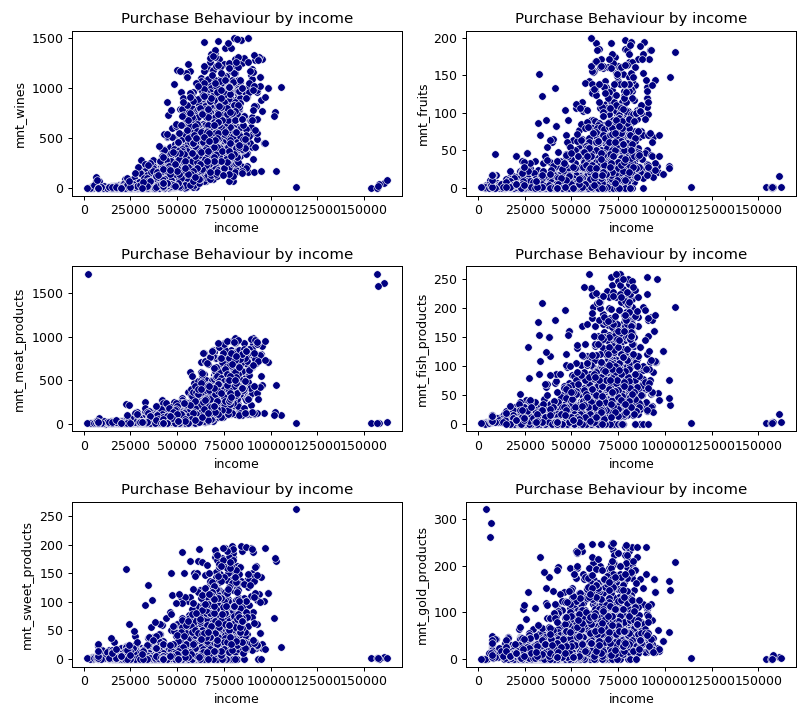

In [61]:
#Creating the list of amounts of items
mnts_list=['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products']

#Plotting a scatterplot with these data similar to as above with num_purchases_cols
plot = 0
fig = plt.figure(figsize=(9,8))
for i in range(len(mnts_list)):
    plot += 1
    ax = plt.subplot(3,2, plot)
    sns.scatterplot(y=df[mnts_list[i]], x=df['income'], color='navy')
    plt.title('Purchase Behaviour by income')
plt.tight_layout()
plt.show()

The plots may show some suggestions of a positive relationship between `mnt_{type}_products` and `income` but it lacks the visualisation we need to make a solid determination.

For further analysis, The *log* scale of the the `income` variable and the `mnt_{type}_products` variables are plotted.

<IPython.core.display.Javascript object>


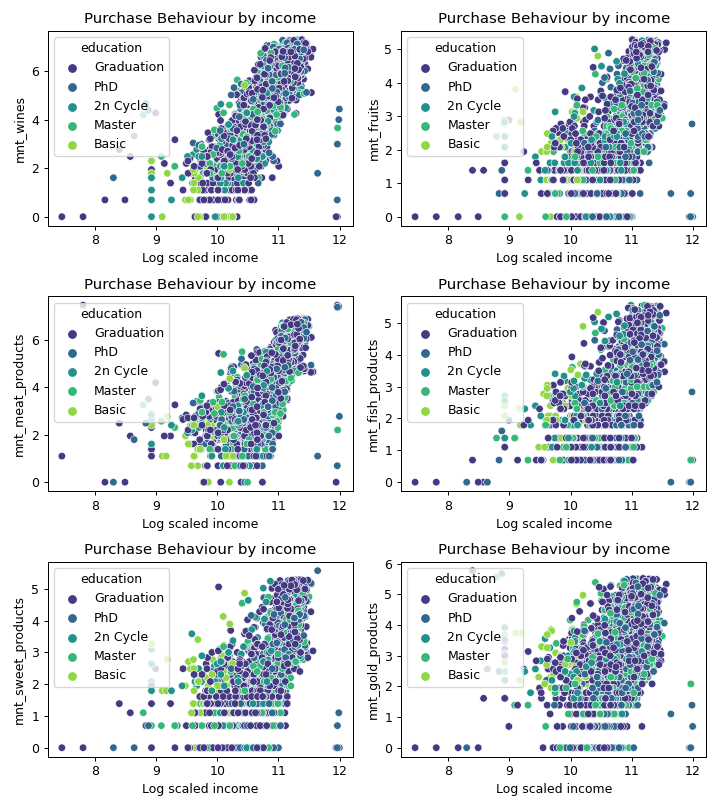

In [64]:
axes = [None for column in mnts_list]
plot = 0
fig = plt.figure(figsize=(8,9))
for i in range(len(mnts_list)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.scatterplot(y=np.log(df[mnts_list[i]]), x=np.log(df['income']), hue=df['education'], palette='viridis')
    ax.set_xlabel('Log scaled income')
    plt.title('Purchase Behaviour by income')
plt.tight_layout()
plt.show()

Log scaled `income` helped visualising the positive linearity of the two variables, but it is still difficult to read the plots as many of the points of each `education` level are scattered randomly. To further investigate, it is useful to split each of these plots into multiple individual plots.

### Purchasing Behavior by Education and Income <a class="anchor" id="section3_4"></a>

A seaborn method called `.FacetGrid()` is used to see how education effects purchasing behavior along with `income`. It gives a much clearer picture than the `hue` parameter in previous plots. In this analysis, a loop and a dynamic Python variable are used to plot six sets of `.FacetGrid()` plots.

<IPython.core.display.Javascript object>


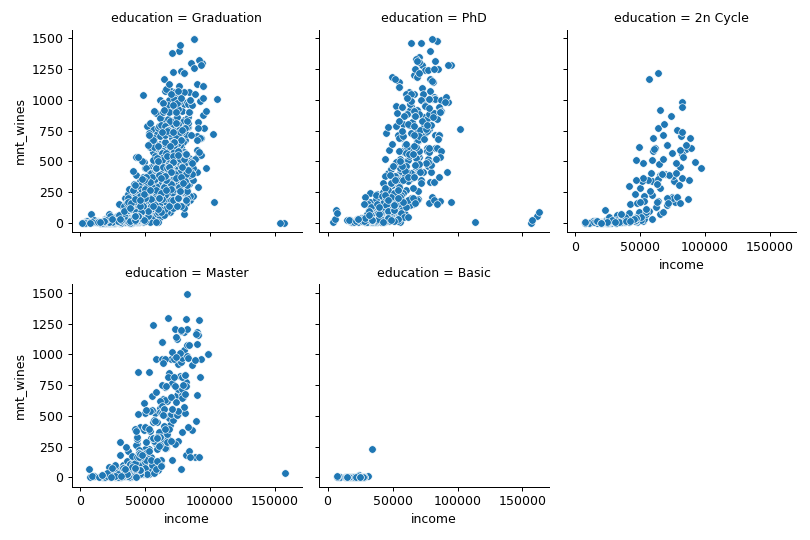

<IPython.core.display.Javascript object>


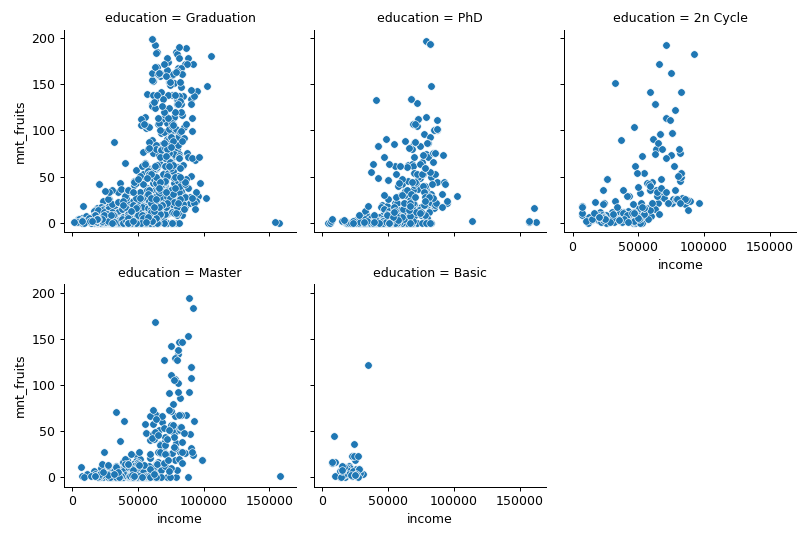

<IPython.core.display.Javascript object>


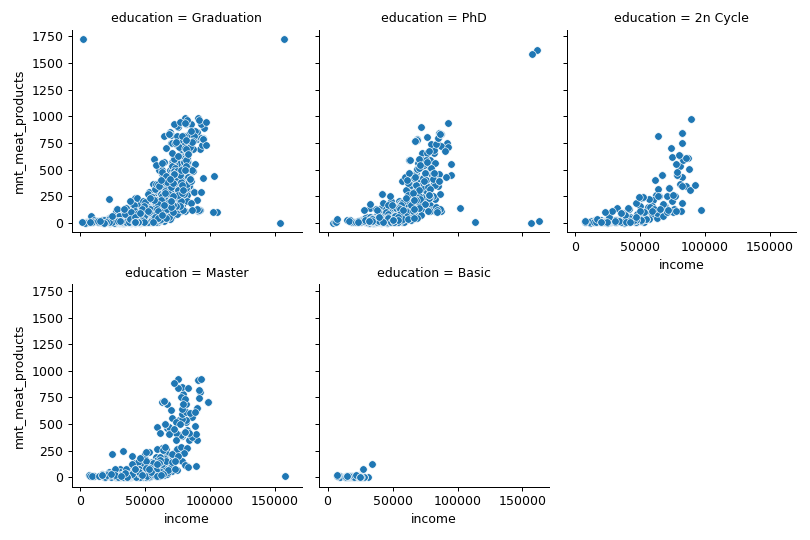

<IPython.core.display.Javascript object>


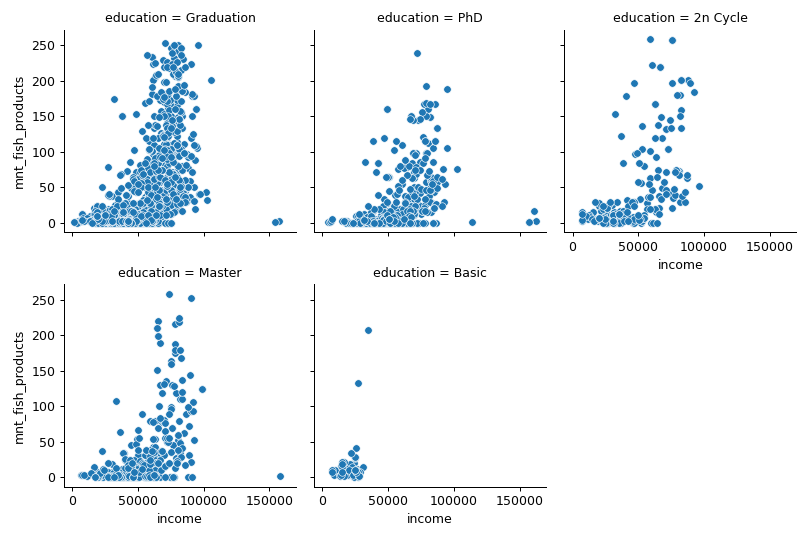

<IPython.core.display.Javascript object>


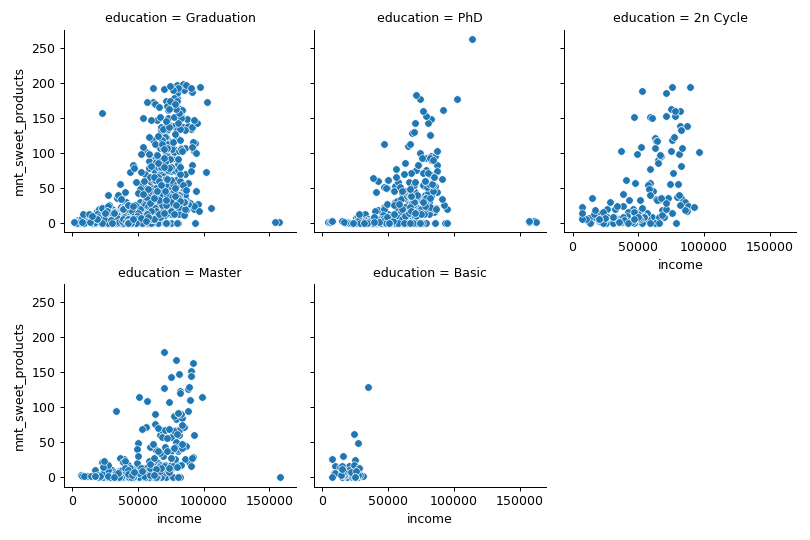

<IPython.core.display.Javascript object>


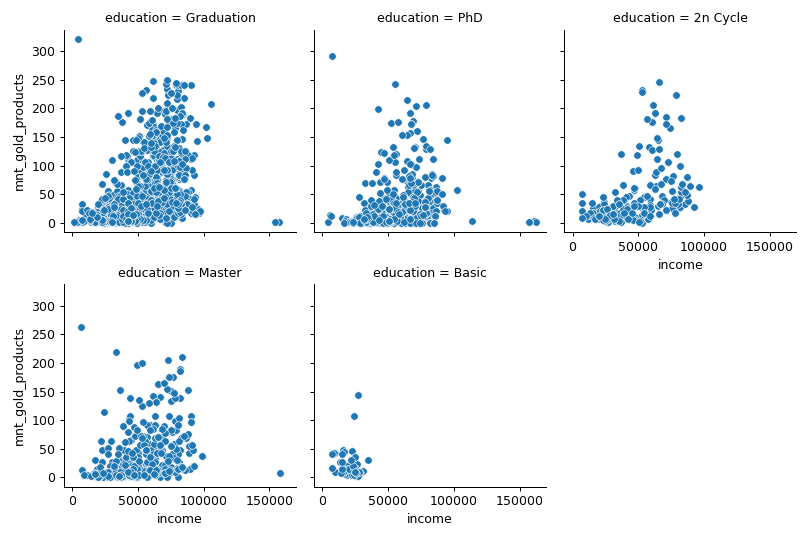

In [66]:
#Create a dictionary to hold dynamic variables
var_name = {}

for i in range(6):
    var_name['g{0}'.format(i)] = sns.FacetGrid(df, col='education', col_wrap=3) #Defining FacetGrid
    var_name['g{0}'.format(i)].map(sns.scatterplot, 'income', mnts_list[i]) #mapping the FacetGrid with scatterplot
plt.show()

The following can be seen:
* This store does not have many shoppers with a `Basic` education level.
* Regardless of the shopper's educational level, there is a positive, linear relationship for each `mnt_{type}_products`.
* `mnt_wines` has the strongest positive, linear relationship with `education` by `income`.

Higher education, higher income makes people want to drink more wine? Who knows!

### Purchasing Behavior by Age <a class="anchor" id="section3_5"></a>

The last main variable in our analysis plan is `age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_{type}_products` vs. `age`
* `num_{type}_purchases` vs. `age`

The process used to plot each one of these graphs is very similar to the one outlined in the Purchasing Behavior by income section.

<IPython.core.display.Javascript object>


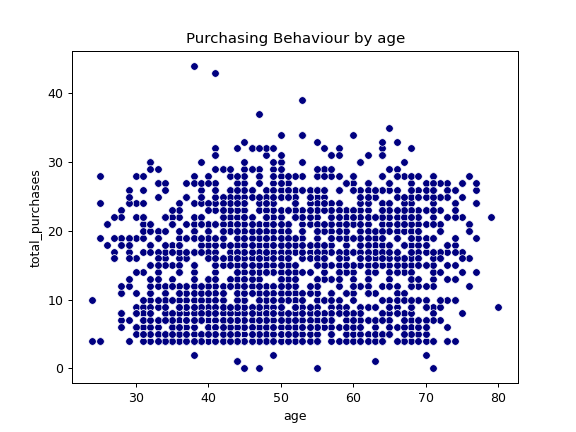

In [69]:
#Plotting the scatterplot of total_purchases against age
plt.figure()
sns.scatterplot(x=df['age'], y=df['total_purchases'], color='navy')
plt.title('Purchasing Behaviour by age')
plt.show()

This barely shows us anything meaningful, so we have to visualise deeper!

<IPython.core.display.Javascript object>


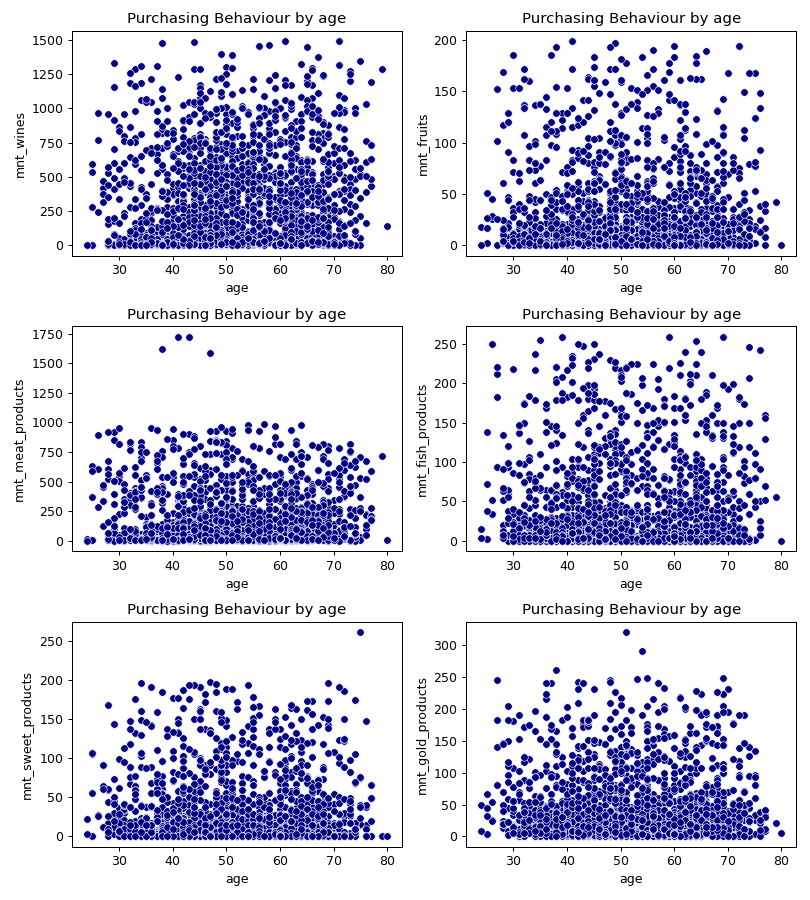

In [72]:
plot = 0
fig = plt.figure(figsize=(9,10))
for i in range(len(mnts_list)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.scatterplot(y=df[mnts_list[i]], x=df['age'], color='navy')
    plt.title('Purchasing Behaviour by age')
plt.tight_layout()
plt.show()

Welp, that wasn't as helpful as I thought it would be. Now to plot a scatterplot with the number of purchases instead of types of purchases.

<IPython.core.display.Javascript object>


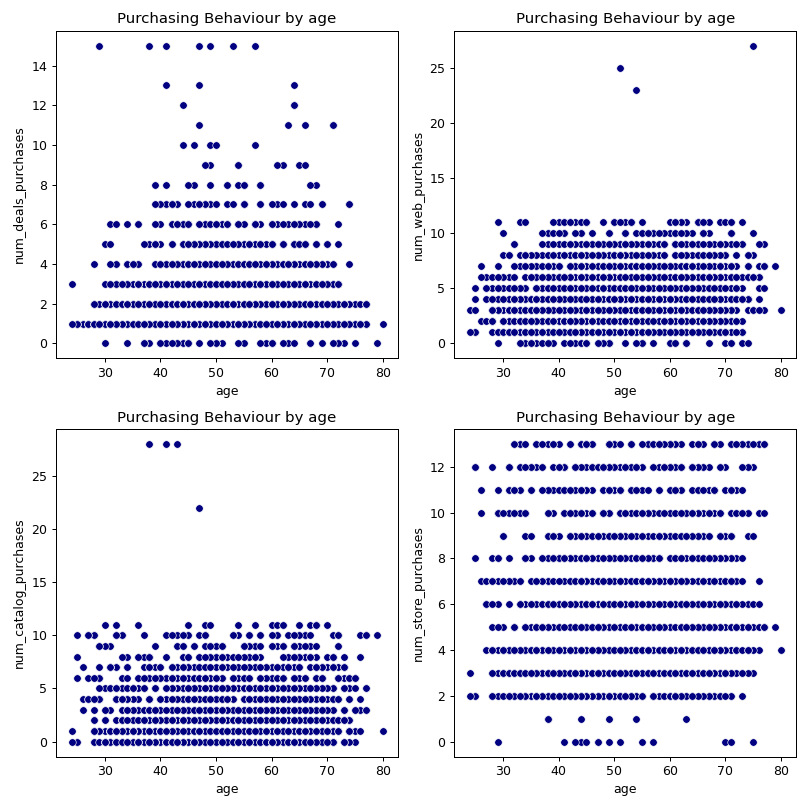

In [74]:
plot = 0
fig = plt.figure(figsize=(9,9))
for i in range(len(num_purchases_cols)):
    plot += 1
    ax = plt.subplot(2, 2, plot)
    sns.scatterplot(x=df['age'], y=df[num_purchases_cols[i]], color='navy')
    plt.title('Purchasing Behaviour by age')
plt.tight_layout()
plt.show()

Still not exactly what we are looking for, think we have to be more specific with the age.

To do further analysis on the `age` variable, A new column called `age_group` is added to `marketing_data`. It contains the following categories of ages:
* `18 to 35`
* `36 to 50`
* `51 to 70`
* `71 and Older`

This categorical variables may give a more clear story.

<IPython.core.display.Javascript object>


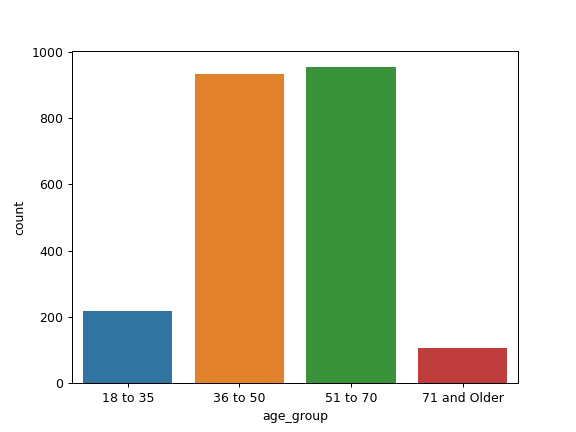

In [76]:
#Creating the age_group types
def age_group(age):
    if 18 <= age <= 35 : 
        return '18 to 35' 
    elif 35 < age <= 50 : 
        return '36 to 50'
    elif 50 < age <= 70 : 
        return '51 to 70'
    else : 
        return '71 and Older'

#Creating the age_group column into the DataFrame
df['age_group'] = df['age'].apply(age_group)

#Plotting the age group bar chart
plt.figure()
sns.countplot(df['age_group'], order=['18 to 35', '36 to 50', '51 to 70', '71 and Older'])
plt.show()

Seems like `age_group` of '36 to 50' and '51 to 70' dominated the store!

To further analyse, a new DataFrame is created, which only has information about shopper age (`age` and `age_group`) and the total purchase amounts each age group buys (`mnt_{type}_products`). This new DataFrame will have `age_groups` as row data to make plotting a grouped bar graph easier.

In [81]:
#Creating the new dataframe with age and purchase amounts as columsn
age_amounts_df = df.loc[:, ('age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products')]

#Breaking the age bins
bins = [18, 35, 50, 70, 150]

#Labelling the age bins
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

#Adding age group into new age_amounts_df DataFrame
age_amounts_df['age_group'] = pd.cut(age_amounts_df.age, bins=bins, labels=labels)
age_amounts_df = age_amounts_df.groupby('age_group').sum().reset_index()

#Inspecting the new dataframe
age_amounts_df

,age_group,age,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products
0,18 to 35,6957,56038,6642,44974,8801,6648,9271
1,36 to 50,41074,237527,22553,137596,32303,23731,37050
2,51 to 70,57225,329022,25336,159619,36399,25433,45998
3,71 and Older,7747,52709,3710,27281,5776,4015,4845


We created a new DataFrame, now we want to further plot the new data.

<IPython.core.display.Javascript object>


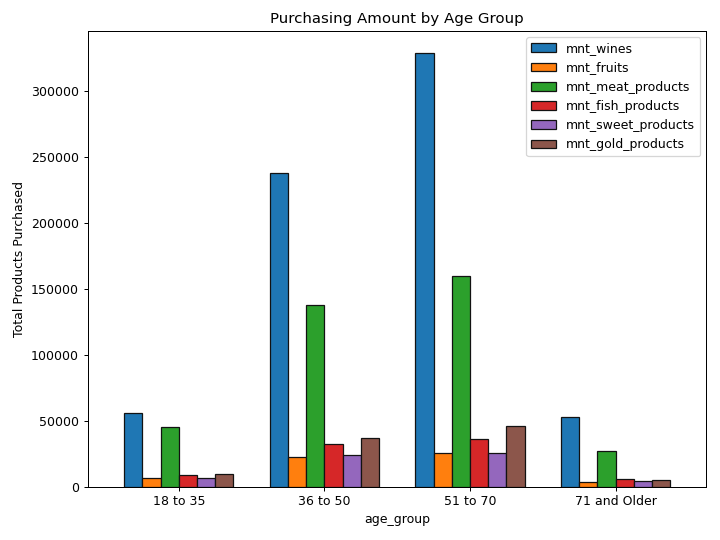

In [91]:
fig, ax = plt.subplots(figsize=(8,6))

col_products = ['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products']

#Creating a bar graph
age_amounts_df.plot(x='age_group', y=col_products, kind='bar', ax=ax, width=0.75, edgecolor='#121212')
plt.title('Purchasing Amount by Age Group')
plt.xticks(rotation=0)
plt.ylabel('Total Products Purchased')
plt.tight_layout()
plt.show()

We still see similar types of products being the main purchases across each age group. For example all age groups have `mnt_wines` as the top purchase, `mnt_meat_products` as the second top purchase and `mnt_fruits` as the least bought item.

`mnt_fish_products`, `mnt_sweet_products` and `mnt_gold_products` alternates between each other across each age group, but it is not enough information to make a finding.

We can further analyse this data we have gotten with a boxplot.

<IPython.core.display.Javascript object>


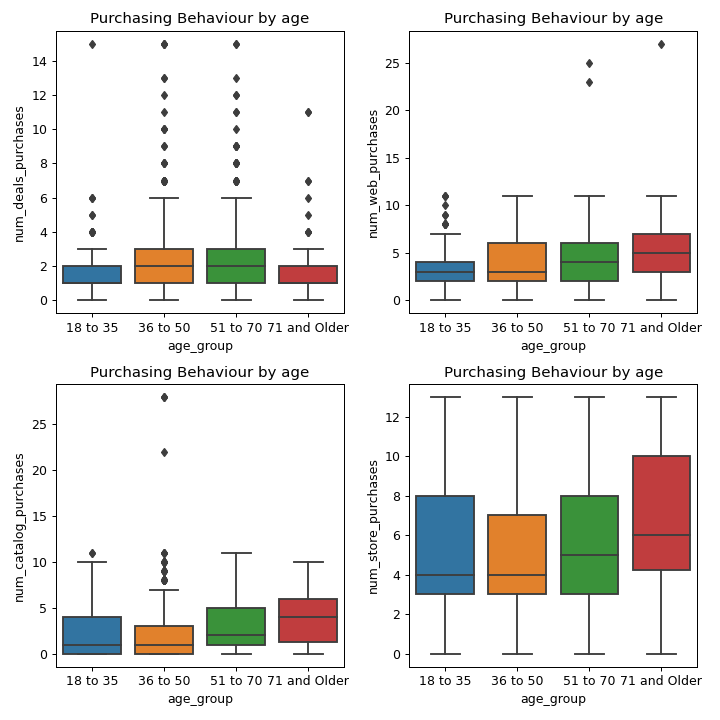

In [93]:
plot = 0
fig = plt.figure(figsize=(8,8))

for i in range(len(num_purchases_cols)):
    plot += 1
    ax = plt.subplot(2, 2, plot)
    sns.boxplot(x=df['age_group'], y=df[num_purchases_cols[i]], order=["18 to 35", "36 to 50", "51 to 70", "71 and Older"])
    plt.title('Purchasing Behaviour by age')
plt.tight_layout()
plt.show()

This chart yields some very interesting insights. Here are some notable ones:
* `18 to 35` and `71 and Older` age groups tend to be the least interested in deals. May be due to reduced customers from this age group.
* On average, `71 and Older` age group customers tend to shop the most online, in store, and through the catalog. May be due to convenience.
* `36 to 50` and `51 to 70` age groups are interested in deals. Most likely this is because they receive more deals since they have more loyal customers.

This information could be super helpful for a marketing department as strategies:
- Create more deals that target age groups of `18 to 35` and `71 and Older`.
- Using online marketing such as Google advertisements or Instagram to target `18 to 35` age groups into shopping online more.
- Create in-store promotions or campaigns to boost more visitors to the store from the `36 to 50` age group.

### Conclusions

#### Findings

This Data Analysis have made a few plots that visualises the relationships between
- `income` and `Purchasing Behaviour`
- `income` and `Purchasing Behaviour` by `education` level
- `age` and `Purchasing Behaviour`
- `age` and `Purchasing Behaviour` by `age group`

We have found some interesting insights:
- There is a positive and linear relationship between `income` and `Purchasing Behaviour`
- The store has very little `Basic` education level visitors
- Wine in particular shows the strongest positively linear relationship with `education` by `income
- `36 to 50` and `51 to 70` age groups dominates the store purchases
- `71 and Older` age groups tend to make purchases online and through catalogs
- Marketing strategies can be cleverly engineered to target age groups of `18 to 35` and `71 and Older` to shop more with the store.
